## LAB-3
### Name: Harshitha Anishetty
### StudenID: 8903318

### How Bmi is effecting disease progession?

In [341]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("tableau-colorblind10")

### Loading Diabetes Dataset

In [342]:
# loading data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) 
diabetes_X_view = pd.DataFrame(diabetes_X)
diabetes_X_view.columns = ["age", "sex", "bmi", "bp", "s1", "s2", "s3","s4","s5","s6"]
diabetes_X_view

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Diabetes dataset (dependent variable dataset)

In [343]:
diabetes_y_view = pd.DataFrame(diabetes_y)
diabetes_y_view.columns = ["Disease Progression"]
diabetes_y_view

,Disease Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Diabetes dataset on BMI

In [344]:
diabetes_bmi = diabetes_X[:, 2].reshape((-1, 1))
diabetes_bmi_view = pd.DataFrame(diabetes_bmi)
diabetes_bmi_view.columns = ["bmi"]
diabetes_bmi_view

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


### Training data for BMI and Disease Progression

In [345]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_bmi, diabetes_y, test_size=0.2, random_state=0)
X_y_train_view = pd.DataFrame(
    {'train bmi': X_train.flatten(), 'train disease': y_train})
X_y_train_view.columns = ["Bmi",
                          "Disease progression"]
X_y_train_view

,Bmi,Disease progression
0,0.002417,85.0
1,-0.077342,137.0
2,-0.035307,53.0
3,0.001339,51.0
4,0.020739,197.0
...,...,...
348,-0.007284,248.0
349,-0.030996,91.0
350,-0.021295,281.0
351,-0.073030,142.0


### Testing data for BMI and Disease Progression

In [346]:
X_y_test_view = pd.DataFrame(
    {'Test bmi': X_test.flatten(), 'Test disease': y_test})
X_y_test_view.columns = ["Test data Bmi",
                         "Test data progression"]
X_y_test_view

,Test data Bmi,Test data progression
0,0.104809,321.0
1,0.060618,215.0
2,0.008883,127.0
3,-0.023451,64.0
4,0.045529,175.0
...,...,...
84,-0.089197,104.0
85,-0.070875,49.0
86,0.043373,103.0
87,0.014272,142.0


### Train the model

In [347]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict the data based on test data

In [348]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
y_pred_view = pd.DataFrame({'disease progression': y_pred.flatten()})
y_pred_view.columns = ["Predicted Data disease progression"]
y_pred_view

,Predicted Data disease progression
0,255.174269
1,211.794626
2,161.008702
3,129.267499
4,196.982065
...,...
84,64.727054
85,82.713736
86,194.865984
87,166.298902


### Coefficients and Intercept

In [349]:
# the coefficient
print('Coefficients: \n', model.coef_)

print('Intercept: \n :', model.intercept_)

Coefficients: 
 [981.65543614]
Intercept: 
 : 152.28824927379569


### Train Data: BMI vs Disease Progression

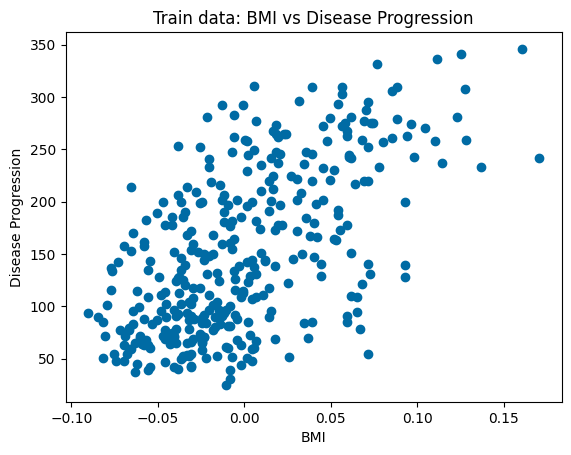

In [350]:
# Plot the outputs
plt.title("Train data: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.scatter(X_train, y_train)
plt.show()


### Test Data: BMI vs Disease Progression

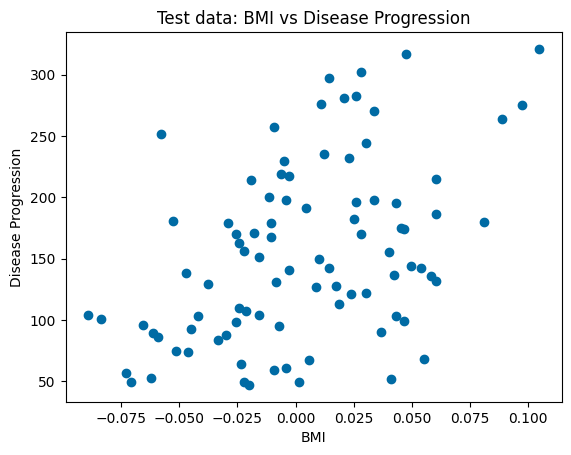

In [351]:
plt.title("Test data: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.scatter(X_test, y_test)
plt.show()


### Slope line for predicted data BMI vs Disease Progression

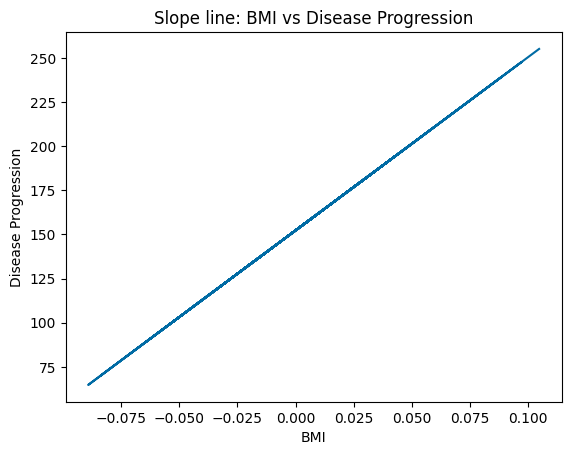

In [352]:
plt.title("Slope line: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.plot(X_test, y_pred)
plt.show()


### Final Graph: BMI vs Disease Progression

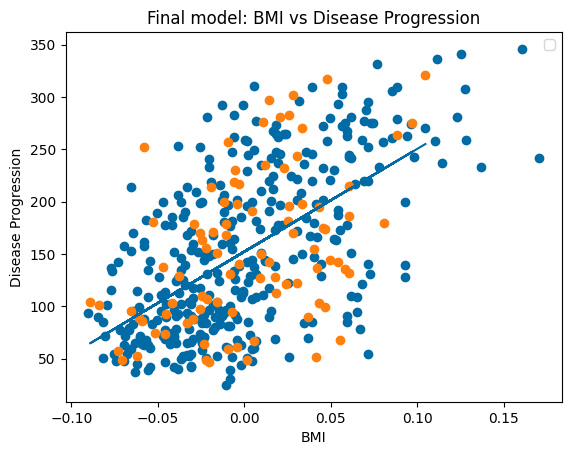

In [353]:
plt.title("Final model: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend(["Training Data", "Testing Data", "Predicated Slope"])
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Testing Data")
plt.plot(X_test, y_pred, label="Predicated Slope")
plt.show()


### Loss of Train Data

In [354]:
y_train_pred = model.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))

3827.8186984113813


### Loss of Test Data

In [355]:
print(mean_squared_error(y_test, y_pred))

4150.6801893299835


#### Coefficient: 981.65 
#### Intercept:  152.28      
#### Mean squared error: 4150.68

##### The loss on the train and test datasets is a measure of how well the model performs on both the data it was trained on and unseen data. As lower MSE indicates a better fit, I don't think this is a good fit.